<a href="https://colab.research.google.com/github/yurikomuta/fraud_detection_ML/blob/main/PaySim_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Análise de dataset do [PaySim](https://www.kaggle.com/datasets/gopalmahadevan/fraud-detection-example) diretamente do Kaggle.

#Content
step - unidade de tempo (1 hora)

type - CASH-IN, CASH-OUT, DÉBITO, PAGAMENTO e TRANSFERÊNCIA.

amount - valor da transação em moeda local.

nameOrig - originador da transação

oldbalanceOrg - saldo inicial (antes da transação)

newbalanceOrig - novo saldo (após transação)

nameDest - destinatário da transação

oldbalanceDest - saldo inicial antes da transação.

newbalanceDest - novo saldo após a transação.

isFraud - O agente fraudulento assume o controle das contas dos clientes e tenta esvaziá-las transferindo para outra conta e depois sacando.

isFlaggedFraud – Uma tentativa ilegal de transferir uma grande quantidade de dinheiro em uma única transação.

**Bibliotecas**

In [1]:
import pandas as pd


Instalação pandas profilling

In [2]:
df = pd.read_csv('/content/fraud_dataset_example.csv')
print(df)

        step      type      amount     nameOrig  oldbalanceOrg  \
0          1   PAYMENT     9839.64  C1231006815      170136.00   
1          1   PAYMENT     1864.28  C1666544295       21249.00   
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
4          1   PAYMENT    11668.14  C2048537720       41554.00   
...      ...       ...         ...          ...            ...   
101608    10   PAYMENT     7477.02   C513257306         785.00   
101609    10  CASH_OUT   282252.35   C210473293      220339.29   
101610    10   PAYMENT    17289.01   C807582280           0.00   
101611    10  TRANSFER  1347146.45  C1315779140        1605.00   
101612    10  CASH_OUT   469539.21   C515691325       31133.00   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0            160296.36  M1979787155            0.00            0.00        0   
1             19384.72  M2044282225            

In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

*manipulando colunas de fraudes para ínicio*

In [4]:
df = df[['isFraud',
       'isFlaggedFraud','step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
df.head()

isFraud  isFlaggedFraud  step      type    amount     nameOrig  \
0        0               0     1   PAYMENT   9839.64  C1231006815   
1        0               0     1   PAYMENT   1864.28  C1666544295   
2        1               0     1  TRANSFER    181.00  C1305486145   
3        1               0     1  CASH_OUT    181.00   C840083671   
4        0               0     1   PAYMENT  11668.14  C2048537720   

   oldbalanceOrg  newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  
0       170136.0       160296.36  M1979787155             0.0             0.0  
1        21249.0        19384.72  M2044282225             0.0             0.0  
2          181.0            0.00   C553264065             0.0             0.0  
3          181.0            0.00    C38997010         21182.0             0.0  
4        41554.0        29885.86  M1230701703             0.0             0.0

Dicionário

colunas={
  'isFraud' = 'Fraude',
  'isFlaggedFraud' = 'Alerta FR',
  'step' = 'Tempo',
  'type' = 'Tipo',
  'amount' = 'Valor',
  'nameOrig' = 'cliente1',
  'oldbalanceOrg' = 'saldo_inicial_c1',
  'newbalanceOrig' = 'novo_saldo_c1',
  'nameDest' = 'cliente2',
  'oldbalanceDest' = 'saldo_inicial_c2',
  'newbalanceDest' = 'novo_saldo_c2',
}

In [5]:
colunas={
  'isFraud' : 'Fraude',
  'isFlaggedFraud' : 'Alerta FR',
  'step' : 'Tempo',
  'type' :'Tipo',
  'amount' : 'Valor',
  'nameOrig' : 'cliente1',
  'oldbalanceOrg' : 'saldo_inicial_c1',
  'newbalanceOrig' : 'novo_saldo_c1',
  'nameDest' : 'cliente2',
  'oldbalanceDest' : 'saldo_inicial_c2',
  'newbalanceDest' : 'novo_saldo_c2',
}

In [6]:
df = df.rename(columns = colunas)
df.head()

Fraude  Alerta FR  Tempo      Tipo     Valor     cliente1  \
0       0          0      1   PAYMENT   9839.64  C1231006815   
1       0          0      1   PAYMENT   1864.28  C1666544295   
2       1          0      1  TRANSFER    181.00  C1305486145   
3       1          0      1  CASH_OUT    181.00   C840083671   
4       0          0      1   PAYMENT  11668.14  C2048537720   

   saldo_inicial_c1  novo_saldo_c1     cliente2  saldo_inicial_c2  \
0          170136.0      160296.36  M1979787155               0.0   
1           21249.0       19384.72  M2044282225               0.0   
2             181.0           0.00   C553264065               0.0   
3             181.0           0.00    C38997010           21182.0   
4           41554.0       29885.86  M1230701703               0.0   

   novo_saldo_c2  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

#Conhecendo mais o df


In [7]:
df.describe()

Fraude  Alerta FR          Tempo         Valor  \
count  101613.000000   101613.0  101613.000000  1.016130e+05   
mean        0.001142        0.0       8.523457  1.740901e+05   
std         0.033768        0.0       1.820681  3.450199e+05   
min         0.000000        0.0       1.000000  3.200000e-01   
25%         0.000000        0.0       8.000000  1.001659e+04   
50%         0.000000        0.0       9.000000  5.338541e+04   
75%         0.000000        0.0      10.000000  2.124984e+05   
max         1.000000        0.0      10.000000  1.000000e+07   

       saldo_inicial_c1  novo_saldo_c1  saldo_inicial_c2  novo_saldo_c2  
count      1.016130e+05   1.016130e+05      1.016130e+05   1.016130e+05  
mean       9.071753e+05   9.234992e+05      8.810428e+05   1.183998e+06  
std        2.829575e+06   2.867319e+06      2.399949e+06   2.797761e+06  
min        0.000000e+00   0.000000e+00      0.000000e+00   0.000000e+00  
25%        0.000000e+00   0.000000e+00      0.000000e+00   0.000000e+00  
50%        2.019047e+04   0.000000e+00      2.105800e+04   5.178343e+04  
75%        1.947150e+05   2.192178e+05      5.919217e+05   1.063122e+06  
max        3.893942e+07   3.894623e+07      3.400874e+07   3.894623e+07

In [8]:
df.describe().T

count          mean           std   min       25%  \
Fraude            101613.0  1.141586e-03  3.376824e-02  0.00      0.00   
Alerta FR         101613.0  0.000000e+00  0.000000e+00  0.00      0.00   
Tempo             101613.0  8.523457e+00  1.820681e+00  1.00      8.00   
Valor             101613.0  1.740901e+05  3.450199e+05  0.32  10016.59   
saldo_inicial_c1  101613.0  9.071753e+05  2.829575e+06  0.00      0.00   
novo_saldo_c1     101613.0  9.234992e+05  2.867319e+06  0.00      0.00   
saldo_inicial_c2  101613.0  8.810428e+05  2.399949e+06  0.00      0.00   
novo_saldo_c2     101613.0  1.183998e+06  2.797761e+06  0.00      0.00   

                       50%         75%          max  
Fraude                0.00        0.00         1.00  
Alerta FR             0.00        0.00         0.00  
Tempo                 9.00       10.00        10.00  
Valor             53385.41   212498.40  10000000.00  
saldo_inicial_c1  20190.47   194715.00  38939424.03  
novo_saldo_c1         0.00   219217.76  38946233.02  
saldo_inicial_c2  21058.00   591921.70  34008736.98  
novo_saldo_c2     51783.43  1063121.64  38946233.02

In [9]:
df.shape

(101613, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Fraude            101613 non-null  int64  
 1   Alerta FR         101613 non-null  int64  
 2   Tempo             101613 non-null  int64  
 3   Tipo              101613 non-null  object 
 4   Valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo_c1     101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [11]:
df.groupby('Fraude').Tempo.count()

Fraude
0    101497
1       116
Name: Tempo, dtype: int64

In [12]:
#checagem de valores nulos
df.isnull().values.any()

False

In [13]:
pip install --upgrade joblib


In [45]:
pip install ydata-profiling


  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


In [47]:
from ydata_profiling import ProfileReport
ProfileReport(df)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
pip install --upgrade visions==0.7.5


  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


In [16]:
!pip install typing-extensions


In [17]:
#enconding var obj > binário
df = pd.get_dummies(data=df, columns=['Tipo'])

In [18]:
df.head()

Fraude  Alerta FR  Tempo     Valor     cliente1  saldo_inicial_c1  \
0       0          0      1   9839.64  C1231006815          170136.0   
1       0          0      1   1864.28  C1666544295           21249.0   
2       1          0      1    181.00  C1305486145             181.0   
3       1          0      1    181.00   C840083671             181.0   
4       0          0      1  11668.14  C2048537720           41554.0   

   novo_saldo_c1     cliente2  saldo_inicial_c2  novo_saldo_c2  Tipo_CASH_IN  \
0      160296.36  M1979787155               0.0            0.0             0   
1       19384.72  M2044282225               0.0            0.0             0   
2           0.00   C553264065               0.0            0.0             0   
3           0.00    C38997010           21182.0            0.0             0   
4       29885.86  M1230701703               0.0            0.0             0   

   Tipo_CASH_OUT  Tipo_DEBIT  Tipo_PAYMENT  Tipo_TRANSFER  
0              0           0             1              0  
1              0           0             1              0  
2              0           0             0              1  
3              1           0             0              0  
4              0           0             1              0

In [19]:
#removendo colunas Alerta FR, cliente1 e client2
df = df.drop (['Alerta FR', 'cliente1', 'cliente2'], axis = 1)
df.head()

Fraude  Tempo     Valor  saldo_inicial_c1  novo_saldo_c1  saldo_inicial_c2  \
0       0      1   9839.64          170136.0      160296.36               0.0   
1       0      1   1864.28           21249.0       19384.72               0.0   
2       1      1    181.00             181.0           0.00               0.0   
3       1      1    181.00             181.0           0.00           21182.0   
4       0      1  11668.14           41554.0       29885.86               0.0   

   novo_saldo_c2  Tipo_CASH_IN  Tipo_CASH_OUT  Tipo_DEBIT  Tipo_PAYMENT  \
0            0.0             0              0           0             1   
1            0.0             0              0           0             1   
2            0.0             0              0           0             0   
3            0.0             0              1           0             0   
4            0.0             0              0           0             1   

   Tipo_TRANSFER  
0              0  
1              0  
2              1  
3              0  
4              0

**Regressão Logistica**

In [20]:
x = df.drop('Fraude', axis= 1)
y = df['Fraude']

In [21]:
#dividindo o todos os volumes de test
from sklearn.model_selection import train_test_split

#seed = replicabilidade
SEED = 42

#25% de test e 75% train
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=SEED)


In [22]:
#Definindo a regressão logistica
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#max_iter = quantidade maxima de interações
lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

#validando a predição por meio das metricas
print("Acurácia", metrics.accuracy_score(y_test, y_pred))
print("Precisão", metrics.precision_score(y_test, y_pred))
print("Recall", metrics.recall_score(y_test, y_pred))
print("F1", metrics.f1_score(y_test, y_pred))

Acurácia 0.9989765391276965
Precisão 0.2
Recall 0.043478260869565216
F1 0.07142857142857142


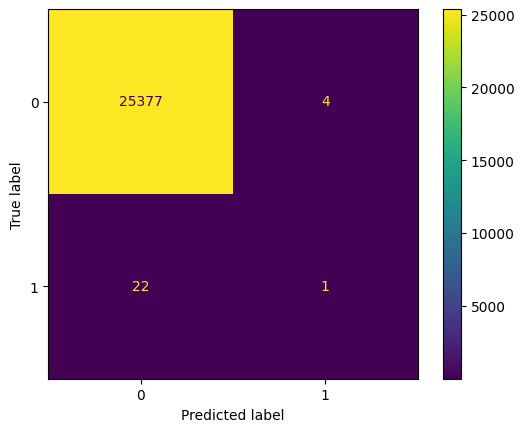

In [23]:
#matriz de confusão
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

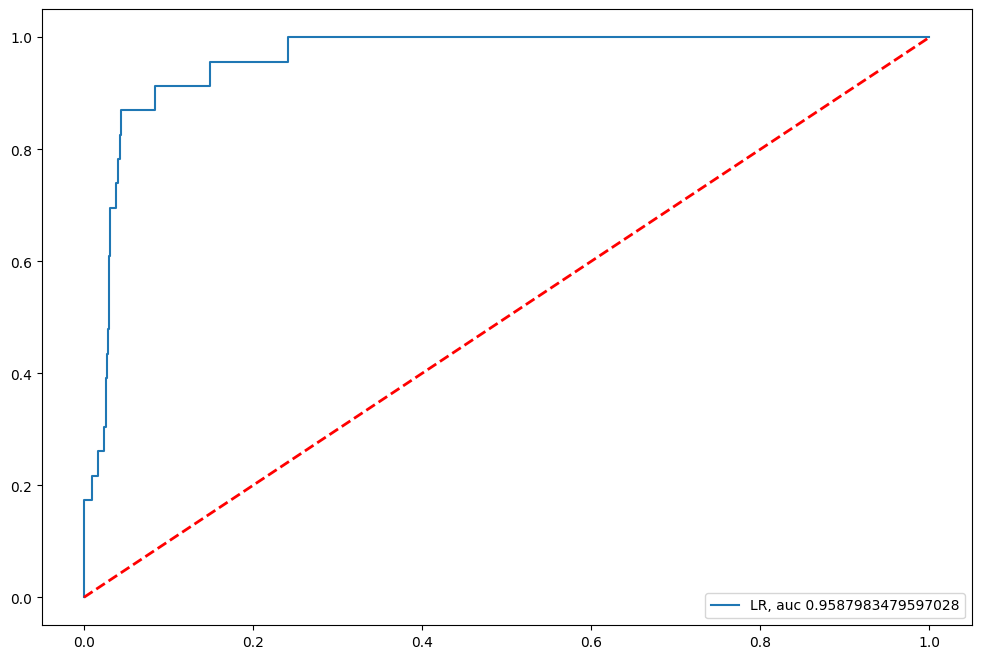

In [24]:
#curva ROC
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12.,8.)
plt.plot(fpr, tpr, label="LR, auc "+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

#undersampling reduz os dados de NFR
#oversampling copia os dados da classe minoritária

SMOTE
knn
imbalanced-learn (biblioteca )

In [25]:
!pip install -U imbalanced-learn

  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires joblib~=1.0.1, but you have joblib 1.3.2 which is incompatible.
pandas-profiling 3.1.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


In [26]:
from imblearn.over_sampling import SMOTE
import numpy as np

SEED= 42

smote = SMOTE (random_state=42)


In [27]:
x = df.drop('Fraude', axis=1)
y = df['Fraude']

x_resampled, y_resampled = smote.fit_resample(x,y)

In [28]:
 df_balanced = pd.concat([y_resampled, x_resampled], axis = 1)
 df_balanced

Fraude  Tempo          Valor  saldo_inicial_c1  novo_saldo_c1  \
0            0      1    9839.640000     170136.000000      160296.36   
1            0      1    1864.280000      21249.000000       19384.72   
2            1      1     181.000000        181.000000           0.00   
3            1      1     181.000000        181.000000           0.00   
4            0      1   11668.140000      41554.000000       29885.86   
...        ...    ...            ...               ...            ...   
202989       1      5   17608.962863      17608.962863           0.00   
202990       1      7   12116.291013      12116.291013           0.00   
202991       1      1  231612.880715     231612.880715           0.00   
202992       1      9  547325.144758     547325.144758           0.00   
202993       1      4  159298.594420     159298.594420           0.00   

        saldo_inicial_c2  novo_saldo_c2  Tipo_CASH_IN  Tipo_CASH_OUT  \
0               0.000000       0.000000             0              0   
1               0.000000       0.000000             0              0   
2               0.000000       0.000000             0              0   
3           21182.000000       0.000000             0              1   
4               0.000000       0.000000             0              0   
...                  ...            ...           ...            ...   
202989          0.000000       0.000000             0              0   
202990          0.000000       0.000000             0              0   
202991       1945.589357    9370.603471             0              0   
202992          0.000000       0.000000             0              0   
202993          0.000000       0.000000             0              0   

        Tipo_DEBIT  Tipo_PAYMENT  Tipo_TRANSFER  
0                0             1              0  
1                0             1              0  
2                0             0              1  
3                0             0              0  
4                0             1              0  
...            ...           ...            ...  
202989           0             0              1  
202990           0             0              1  
202991           0             0              0  
202992           0             0              1  
202993           0             0              1  

[202994 rows x 12 columns]

In [29]:
df_balanced.groupby('Fraude').Tempo.count()

Fraude
0    101497
1    101497
Name: Tempo, dtype: int64

In [30]:
##Novo Teste da LR

x = df_balanced.iloc[:, 1].values
y = df_balanced.iloc [:, 0].values

In [31]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=25, random_state = SEED)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Supondo que x_train e x_test sejam arrays unidimensionais (vetores)
x_train_reshaped = x_train.reshape(-1, 1)
x_test_reshaped = x_test.reshape(-1, 1)

# Definindo a regressão logística
lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_train_reshaped, y_train)
y_pred = lr.predict(x_test_reshaped)

# Validando a predição por meio das métricas
print("Acurácia", metrics.accuracy_score(y_test, y_pred))
print("Precisão", metrics.precision_score(y_test, y_pred))
print("Recall", metrics.recall_score(y_test, y_pred))
print("F1", metrics.f1_score(y_test, y_pred))


Acurácia 0.84
Precisão 0.9230769230769231
Recall 0.8
F1 0.8571428571428571


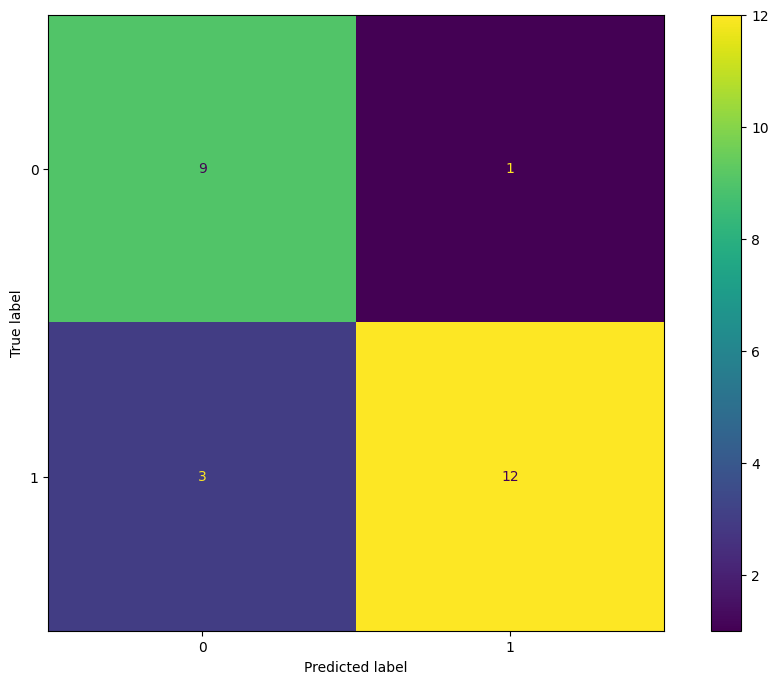

In [33]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

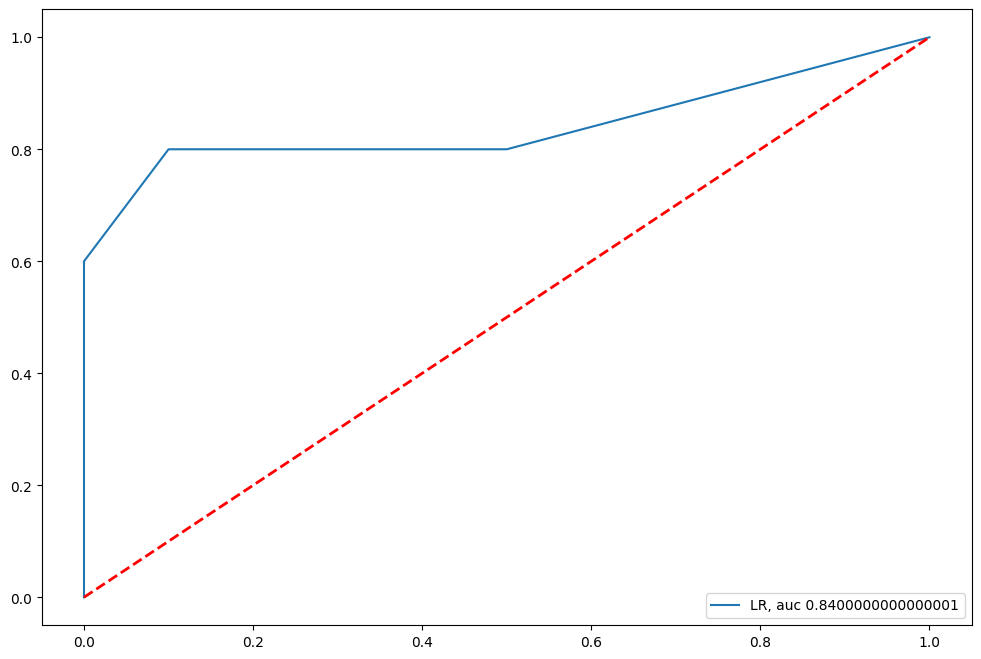

In [34]:
# Supondo que x_test seja um array unidimensional (vetor)
x_test_reshaped = x_test.reshape(-1, 1)

# Calcula a probabilidade da classe 1
y_pred_proba = lr.predict_proba(x_test_reshaped)[:, 1]

# Calcula a curva ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plota a curva ROC
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label="LR, auc "+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)


In [38]:
pip install pydantic-settings


In [48]:
ProfileReport(df_balanced)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Arvoré de decisão**





In [50]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth= 5, random_state=SEED)


In [53]:
model = dt.fit(x_train.reshape(-1, 1), y_train)
y_pred = dt.predict(x_test.reshape(-1, 1))


# Validando a predição por meio das métricas
print("Acurácia", metrics.accuracy_score(y_test, y_pred))
print("Precisão", metrics.precision_score(y_test, y_pred))
print("Recall", metrics.recall_score(y_test, y_pred))
print("F1", metrics.f1_score(y_test, y_pred))


Acurácia 0.84
Precisão 0.9230769230769231
Recall 0.8
F1 0.8571428571428571


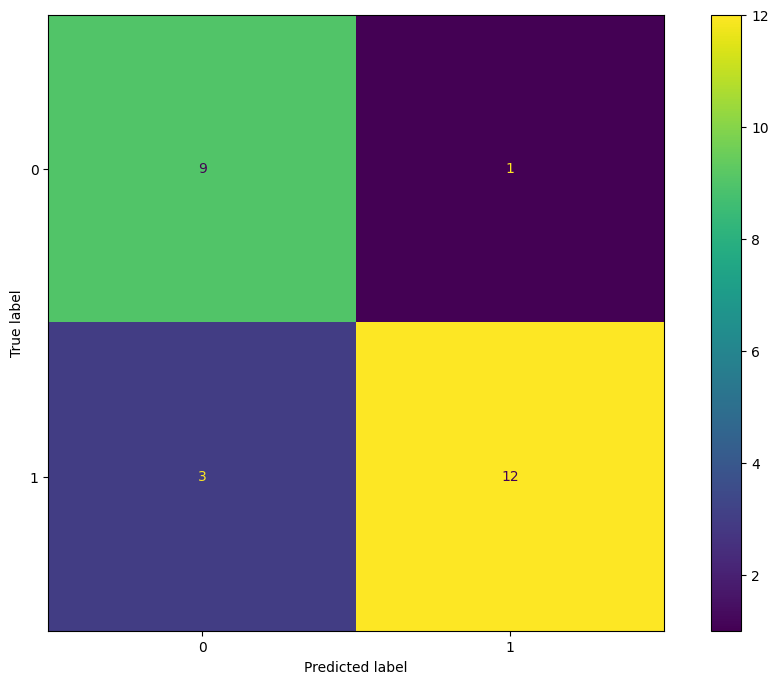

In [55]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

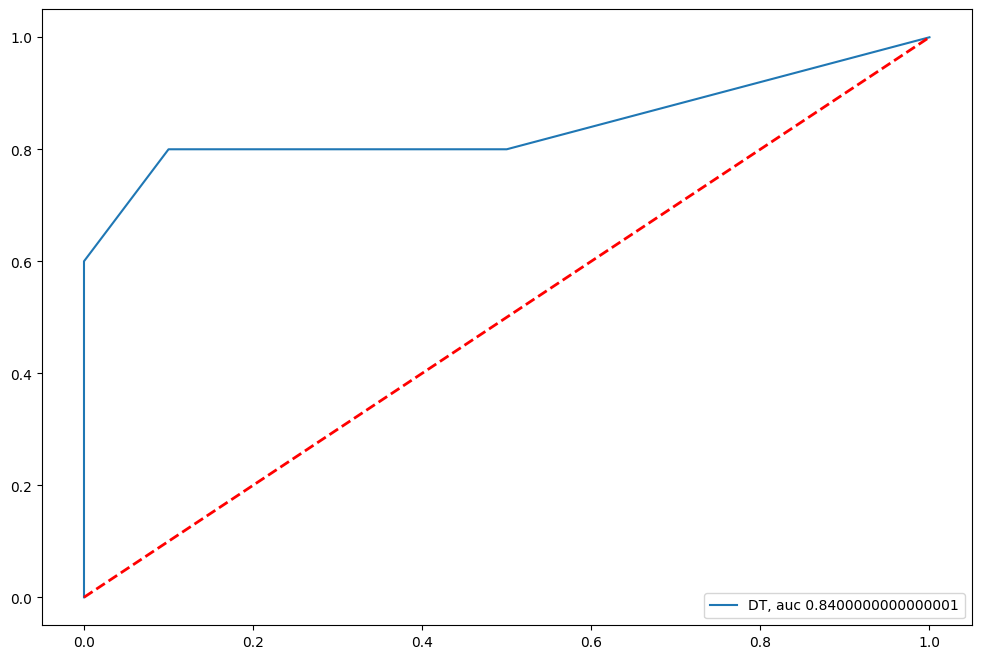

In [59]:
# Supondo que x_test seja um array unidimensional (vetor)
x_test_reshaped = x_test.reshape(-1, 1)

# Calcula a probabilidade da classe 1
y_pred_proba = dt.predict_proba(x_test_reshaped)[::, 1]

# Calcula a curva ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plota a curva ROC
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label="DT, auc "+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)